In [1]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Example documents
texts = ["The city is the largest in the world", "My country is the smallest"]

# Tokenizer and stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def tokenize_stemming(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = text.split()
    return [stemmer.stem(word) for word in tokens if word not in stop_words]

# Tokenize all documents
corpus = [tokenize_stemming(doc) for doc in texts]

# ✅ Create Gensim Dictionary
dictionary = corpora.Dictionary(corpus)

# Convert documents to Bag-of-Words (BoW)
corpus_doc2bow_vectors = [dictionary.doc2bow(doc) for doc in corpus]

print("# Term Frequency:")
print(corpus_doc2bow_vectors)

# TF-IDF model
tfidf_model = models.TfidfModel(corpus_doc2bow_vectors, id2word=dictionary)
corpus_tfidf_vectors = tfidf_model[corpus_doc2bow_vectors]

print("\n# TF-IDF (for doc 0):")
print(list(corpus_tfidf_vectors[0]))


# Term Frequency:
[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1)]]

# TF-IDF (for doc 0):
[(0, 0.5773502691896258), (1, 0.5773502691896258), (2, 0.5773502691896258)]


In [5]:
import gensim

In [6]:
from gensim.models import LdaMulticore

In [7]:
lda_model = gensim.models.LdaMulticore(corpus_doc2bow_vectors, num_topics=10, id2word=dictionary, passes=2, workers=2)


In [8]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_vectors, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.303*"citi" + 0.303*"largest" + 0.303*"world" + 0.045*"smallest" + 0.045*"countri"
Topic: 1 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"citi" + 0.200*"largest"
Topic: 2 Word: 0.422*"smallest" + 0.422*"countri" + 0.052*"world" + 0.052*"largest" + 0.052*"citi"
Topic: 3 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"
Topic: 4 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"
Topic: 5 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"citi" + 0.200*"largest"
Topic: 6 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"
Topic: 7 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"
Topic: 8 Word: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"
Topic: 9 Word: 0.200*"smallest" + 0.200*"countri" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"


In [9]:
for index, score in sorted(lda_model[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6999998688697815	 
Topic: 0.440*"smallest" + 0.440*"countri" + 0.040*"largest" + 0.040*"world" + 0.040*"citi"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"citi" + 0.200*"world"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"citi" + 0.200*"world"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"world" + 0.200*"citi"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"world" + 0.200*"citi"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"citi" + 0.200*"world"

Score: 0.03333335369825363	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"largest" + 0.200*"world" + 0.200*"citi"

Score: 0.03333335369825363	 
Topic: 0.200*"smallest" + 0.200*"countri" + 0.200*"largest" + 0.200*"world" + 0.200*"citi"

Score: 0.03333335369825363	 
Top

In [10]:
for index, score in sorted(lda_model_tfidf[corpus_doc2bow_vectors[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.6999997496604919	 
Topic: 0.422*"smallest" + 0.422*"countri" + 0.052*"world" + 0.052*"largest" + 0.052*"citi"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"citi" + 0.200*"largest"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"citi" + 0.200*"largest"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"

Score: 0.03333335742354393	 
Topic: 0.200*"countri" + 0.200*"smallest" + 0.200*"world" + 0.200*"largest" + 0.200*"citi"

Score: 0.03333335742354393	 
Top

In [11]:
import gensim
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Sample documents
texts = ["The city is the largest in the world", "My country is the smallest"]

# Preprocessing
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def tokenize_stem(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return [stemmer.stem(word) for word in text.split() if word not in stop_words]

# Tokenized and stemmed corpus
tokenized_corpus = [tokenize_stem(doc) for doc in texts]

# Create dictionary and BoW corpus
dictionary = corpora.Dictionary(tokenized_corpus)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

# ✅ Build the LDA model using multiple cores
lda_model = models.LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,
    passes=10,
    workers=2,  # Number of CPU cores
    random_state=42
)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.330*"smallest" + 0.330*"countri" + 0.113*"largest" + 0.113*"citi" + 0.113*"world"')
(1, '0.271*"world" + 0.271*"citi" + 0.271*"largest" + 0.093*"countri" + 0.093*"smallest"')


Word Cloud for Topics (matplotlib + wordcloud)
This shows the top words per topic visually.

In [16]:
!pip install wordcloud

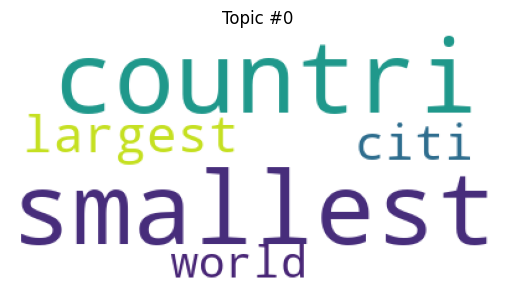

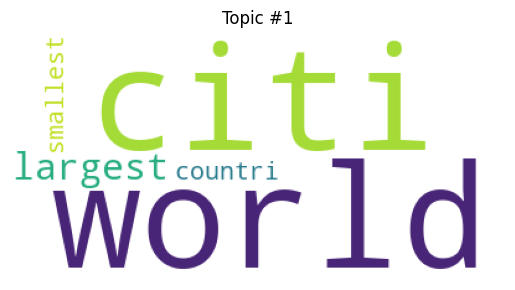

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud for each topic
for i, topic in lda_model.show_topics(formatted=False, num_words=20):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(topic)))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()

 pyLDAvis Interactive Visualization
Great for exploring topic-word and topic-document relationships.

In [13]:
pip install pyLDAvis


  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)

   ------------- -------------------------- 1/3 [numexpr]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis]
   -------------------------- ------------- 2/3 [pyLDAvis

In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()  # for Jupyter notebook
vis = gensimvis.prepare(lda_model, corpus_doc2bow_vectors, dictionary)
pyLDAvis.display(vis)


In [15]:
pyLDAvis.save_html(vis, 'lda_visualization.html')
